In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_wall_z_image(Z_val, fx, fy, cx, cy, szx, szy):
  Z = Z_val*np.ones((szy, szx), dtype=np.float32)
  return Z

def get_road_z_image(H_val, fx, fy, cx, cy, szx, szy):
  y = np.arange(szy).reshape(-1,1)*1.
  y = np.tile(y, (1, szx))
  Z = np.zeros((szy, szx), dtype=np.float32)
  Z[y > cy] = H_val*fy / (y[y>cy]-cy)
  Z[y <= cy] = np.NaN
  return Z


In [3]:
# Focal length along X and Y axis. In class we assumed the smae focal length 
# for X and Y axis. but in general they could be different. We are denoting 
# these by fx and fy.
fx = fy = 128.

# Size of the image
szy = 256
szx = 384

# Center of the image. We are going to assume that the principal point is at 
# the center of the image.
cx = 192
cy = 128

# Gets the image of a wall 2m in front of the camera.
Z1 = get_wall_z_image(2., fx, fy, cx, cy, szx, szy)


# Gets the image of the ground plane that is 3m below the camera.
Z2 = get_road_z_image(3., fx, fy, cx, cy, szx, szy)

In [4]:
def PlotFunction(Z, f, t, w, step):
    cx = (Z.shape[0] - 1)/2
    cy = (Z.shape[1] - 1)/2
    Z = Z[::step, ::step]
    s = Z.shape
    X, Y = np.meshgrid(np.arange(s[0])*step - cx, np.arange(s[1])*step - cy)
    Xcorr=X.reshape(-1, 1)
    Ycorr=Y.reshape(-1, 1)
    Zcorr=Z.reshape(-1, 1)
    #X, Y, Z = X.reshape(-1, 1), Y.reshape(-1, 1), Z.reshape(-1, 1)
    P = np.hstack([Xcorr*step, Ycorr*step, Zcorr])
    #u, v = _calc_uv(P, f, t, w)
    wx, wy, wz = w
    M = np.array([[0, wz, -wy],[-wz, 0, wx],[wy, -wx, 0]])
    P_Update = (-t) - P.dot(M) 
    P_Update = P_Update + P
    u = f*(P_Update[:, 0]/P_Update[:, 2] - P[:, 0]/P[:, 2])
    v = f*(P_Update[:, 1]/P_Update[:, 2] - P[:, 1]/P[:, 2])
    f = plt.figure(figsize=(9,9*s[1]/s[0]))
    ax = f.gca()
    ax.scatter(X, -Y, marker=".")
    ax.quiver(X, -Y, u[:, np.newaxis], -v[:, np.newaxis])
    
    ax.set_ylim(-cy + 1, cy - 1)
    ax.set_xlim(-cx + 1, cx - 1)
    ax.axis('equal')
    plt.show()

 Looking forward on a horizontal plane while driving on a flat road.


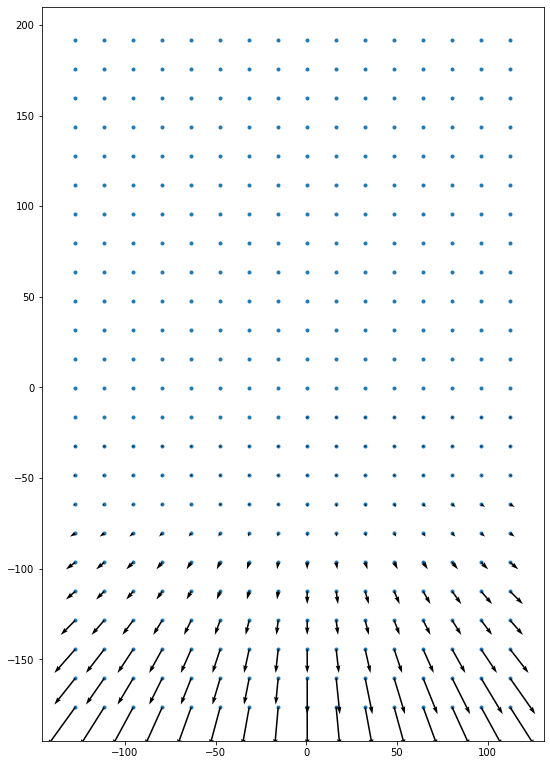

In [5]:
print(" Looking forward on a horizontal plane while driving on a flat road.")
t = np.array([[0, 0, 0.1]])
w = (0.0, 0, 0)
f = 128
PlotFunction(Z2, f, t, w, 16)

 Sitting in a train and looking out over a flat field from a side window


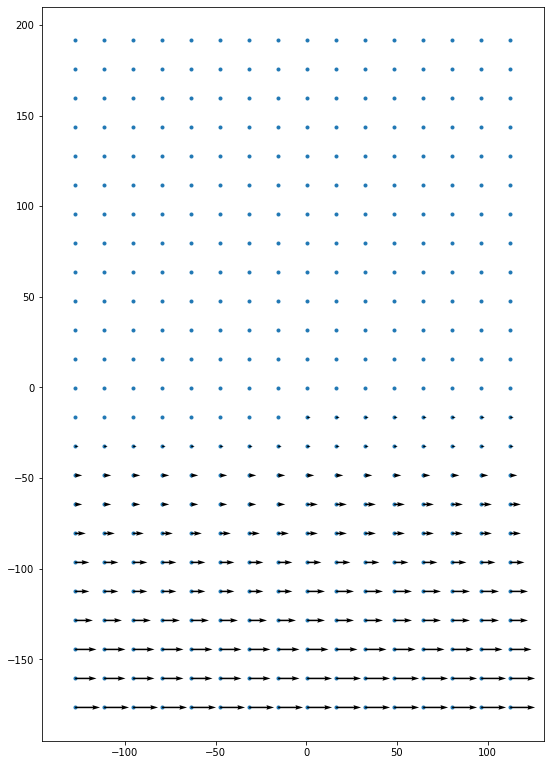

In [6]:
print(" Sitting in a train and looking out over a flat field from a side window")
t = np.array([[-10, 0, 0]])
w = (0.0, 0, 0)
f = 128
PlotFunction(Z2, f, t, w, 16)

Flying into a wall head-on.


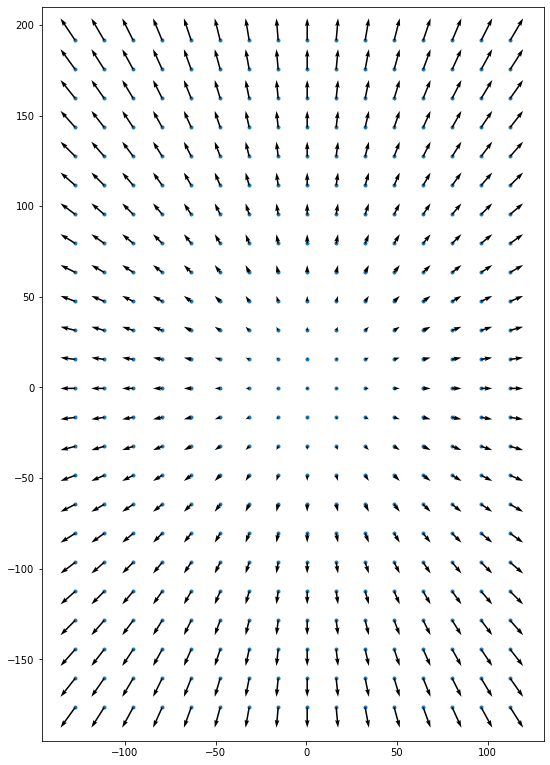

In [7]:
print("Flying into a wall head-on.")
t = np.array([[0, 0, 10]])
w = (0.0, 0, 0)
f = 128
PlotFunction(Z1, -f, t, w, 16)

 Flying into a wall but also translating horizontally, and vertically.


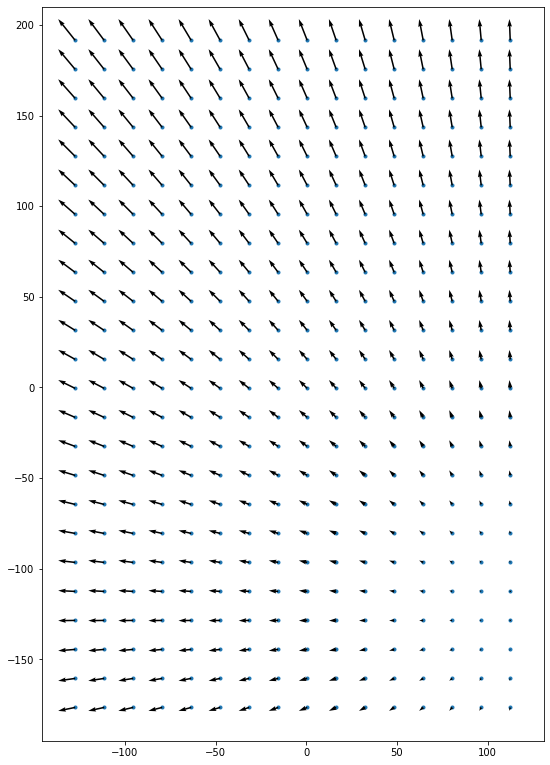

In [8]:
print(" Flying into a wall but also translating horizontally, and vertically.")
t = np.array([[10, 10, 0.01]])
w = (0.0, 0, 0)
f = 128
PlotFunction(Z1, f, t, w, 16)